In [ ]:
pip install seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load data
df = pd.read_csv("../data/sample_transactions.csv")

In [7]:
# Convert to datetime
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")

In [8]:
# Basic info
print(df.head())
print("\nSummary stats:\n", df.describe())
print("\nTransactions per category:\n", df["category"].value_counts())

   tx_id       date  amount currency   merchant       category  \
0      1 2025-08-01   45.23      USD       Uber      Transport   
1      2 2025-08-02   12.50      USD  Starbucks           Food   
2      3 2025-08-03  150.00      USD     Amazon       Shopping   
3      4 2025-08-05  300.00      USD   Employer         Salary   
4      5 2025-08-06   25.00      USD    Netflix  Entertainment   

               description    type    month  
0             Ride to work   debit  2025-08  
1           Morning coffee   debit  2025-08  
2  Electronics accessories   debit  2025-08  
3           Monthly salary  credit  2025-08  
4     Monthly subscription   debit  2025-08  

Summary stats:
           tx_id                 date      amount
count  5.000000                    5    5.000000
mean   3.000000  2025-08-03 09:36:00  106.546000
min    1.000000  2025-08-01 00:00:00   12.500000
25%    2.000000  2025-08-02 00:00:00   25.000000
50%    3.000000  2025-08-03 00:00:00   45.230000
75%    4.000000 

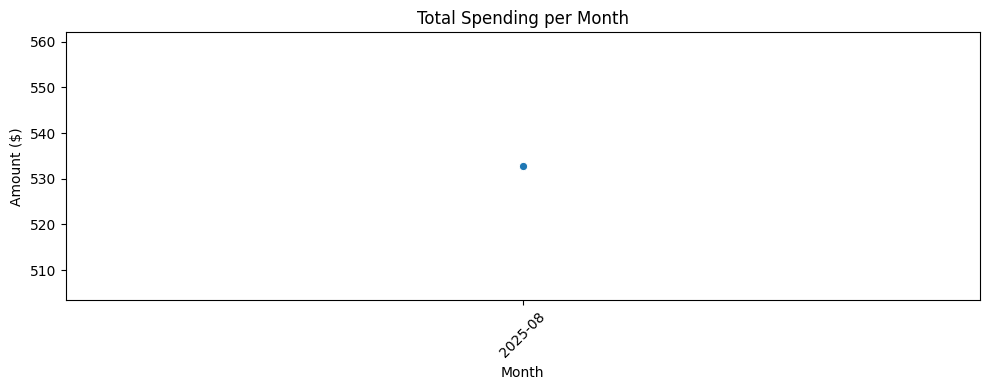

In [10]:
# --- Monthly totals ---
monthly_totals = df.groupby("month")["amount"].sum().reset_index()
monthly_totals["month"] = monthly_totals["month"].astype(str)  # convert Period to string
plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_totals, x="month", y="amount", marker="o")
plt.title("Total Spending per Month")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

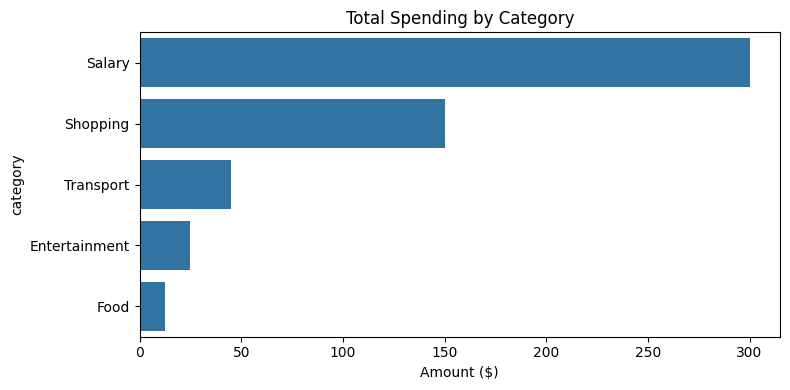

In [11]:
# --- Category breakdown ---
category_totals = df.groupby("category")["amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=category_totals.values, y=category_totals.index)
plt.title("Total Spending by Category")
plt.xlabel("Amount ($)")
plt.tight_layout()
plt.show()

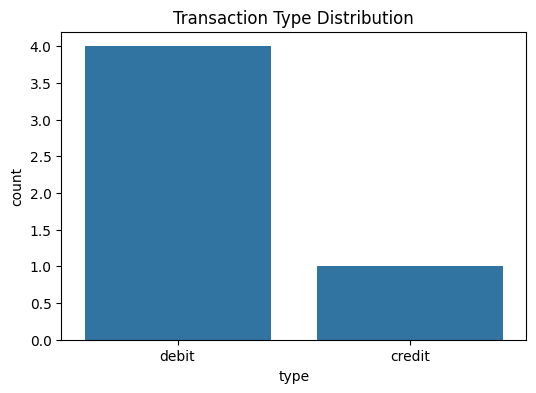

In [14]:
# --- Credits vs Debits ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="type")
plt.title("Transaction Type Distribution")
plt.show()